## Summary

In [18]:
import pandas as pd
import glob
import os
import seaborn as sns
import matplotlib.pyplot as plt


In [19]:
path = r'./data/' # use your path
all_csv = glob.glob(os.path.join(path, "*.csv"))

tweets = []

for filename in all_csv:
    df = pd.read_csv(filename, index_col=None, header=0)
    tweets.append(df)
    
tweets_df = pd.concat(tweets, axis=0, ignore_index=True)
tweets_df

,Unnamed: 0,tweet_id,tweet_text,language,tweet_created_at,retweet,favorite,hashtags,user_id,user_name,user,user_loc,user_follower,friends_count,media,tweet_url
0,1173,1323051948485070853,Este mes estaré participando en el #30DayMapCh...,es,2020-11-01 23:59:00,1,10,"[{'text': '30DayMapChallenge', 'indices': [35,...",1002117891133755392,José Molano-Pulido,JoseFMolano,NaN,261,437,http://pbs.twimg.com/media/ElxsT-SWkAAhiSj.png,https://t.co/Qw7z5xS2Qh
1,1176,1323046291367100416,Antes de que acabe el día. Uno de mis primero...,es,2020-11-01 23:36:31,16,72,"[{'text': '30DayMapChallenge', 'indices': [83,...",384907052,Leticia Luna,Letyludigital,México,1121,2447,http://pbs.twimg.com/media/ElxnlwaVcAEq9yb.jpg,https://t.co/KXhtzKjh2e
2,1177,1323043516629614595,We'll see if I stick with this #30DayMapChalle...,en,2020-11-01 23:25:29,2,15,"[{'text': '30DayMapChallenge', 'indices': [31,...",704329847896678400,Ross Thorn,RealRossThorn,Minnesota,323,482,http://pbs.twimg.com/media/Elxk6HSXEBg-O8d.jpg,https://t.co/QGuHH8qogZ
3,1178,1323042272146034689,Day 1 of #30DayMapChallenge - Points\n\nQuickl...,en,2020-11-01 23:20:33,3,11,"[{'text': '30DayMapChallenge', 'indices': [9, ...",863722747,Tim Rodaway,TimRodaway,"Newcastle Upon Tyne, England",94,283,http://pbs.twimg.com/media/ElxjSlZW0AIxSnq.jpg,https://t.co/yPIDpPpSIJ
4,1179,1323042145255698449,#30DayMapChallenge day 1 Points\nFirst attempt...,en,2020-11-01 23:20:03,1,2,"[{'text': '30DayMapChallenge', 'indices': [0, ...",3641471067,Bert H,BertrandHoud,"Auvergne, France",64,259,http://pbs.twimg.com/media/ElxjxjNXUAAVWUC.jpg,https://t.co/0hCmCUWb5a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2389,409,1324879238609035265,"Day 7 Green #30DayMapChallenge hypothetical, h...",en,2020-11-07 01:00:00,1,1,"[{'text': '30DayMapChallenge', 'indices': [12,...",2599428001,Francis Gasgonia,seateazen,Philippines,72,300,http://pbs.twimg.com/media/EmHyj6MU4AAVPOc.jpg,https://t.co/7ftrA7qjb7
2390,410,1324877195064565760,#30DayMapChallenge \n\nDay 7: Green\n\n✨Northe...,en,2020-11-07 00:51:52,1,4,"[{'text': '30DayMapChallenge', 'indices': [0, ...",45565875,Emil Malta ❄️,emilmalta,Nuuk,176,939,http://pbs.twimg.com/media/EmLoyDnXcAMaxB0.jpg,https://t.co/AM3x8fsHXu
2391,411,1324873389178294278,#30DayMapChallenge\n\nDay 7: Green\n\nData: Op...,en,2020-11-07 00:36:45,2,6,"[{'text': '30DayMapChallenge', 'indices': [0, ...",283445478,philbartie 🇬🇬,philbartie,"Edinburgh, Scotland",237,372,http://pbs.twimg.com/media/EmLlTXiXUAASM0D.jpg,https://t.co/5UcpuGjH52
2392,412,1324873055349469185,¿Inquilinos o dueños? Para el día 6 del #30Day...,es,2020-11-07 00:35:26,3,6,"[{'text': '30DayMapChallenge', 'indices': [40,...",3081831303,Properati Data,Properati_Data,NaN,1176,537,http://pbs.twimg.com/media/EmLlBdKWMAACE6k.jpg,https://t.co/B3SVy7bz1B


In [20]:
tweets_df['date'] = tweets_df['tweet_created_at'].str[:10]

In [21]:
tweets_df

,Unnamed: 0,tweet_id,tweet_text,language,tweet_created_at,retweet,favorite,hashtags,user_id,user_name,user,user_loc,user_follower,friends_count,media,tweet_url,date
0,1173,1323051948485070853,Este mes estaré participando en el #30DayMapCh...,es,2020-11-01 23:59:00,1,10,"[{'text': '30DayMapChallenge', 'indices': [35,...",1002117891133755392,José Molano-Pulido,JoseFMolano,NaN,261,437,http://pbs.twimg.com/media/ElxsT-SWkAAhiSj.png,https://t.co/Qw7z5xS2Qh,2020-11-01
1,1176,1323046291367100416,Antes de que acabe el día. Uno de mis primero...,es,2020-11-01 23:36:31,16,72,"[{'text': '30DayMapChallenge', 'indices': [83,...",384907052,Leticia Luna,Letyludigital,México,1121,2447,http://pbs.twimg.com/media/ElxnlwaVcAEq9yb.jpg,https://t.co/KXhtzKjh2e,2020-11-01
2,1177,1323043516629614595,We'll see if I stick with this #30DayMapChalle...,en,2020-11-01 23:25:29,2,15,"[{'text': '30DayMapChallenge', 'indices': [31,...",704329847896678400,Ross Thorn,RealRossThorn,Minnesota,323,482,http://pbs.twimg.com/media/Elxk6HSXEBg-O8d.jpg,https://t.co/QGuHH8qogZ,2020-11-01
3,1178,1323042272146034689,Day 1 of #30DayMapChallenge - Points\n\nQuickl...,en,2020-11-01 23:20:33,3,11,"[{'text': '30DayMapChallenge', 'indices': [9, ...",863722747,Tim Rodaway,TimRodaway,"Newcastle Upon Tyne, England",94,283,http://pbs.twimg.com/media/ElxjSlZW0AIxSnq.jpg,https://t.co/yPIDpPpSIJ,2020-11-01
4,1179,1323042145255698449,#30DayMapChallenge day 1 Points\nFirst attempt...,en,2020-11-01 23:20:03,1,2,"[{'text': '30DayMapChallenge', 'indices': [0, ...",3641471067,Bert H,BertrandHoud,"Auvergne, France",64,259,http://pbs.twimg.com/media/ElxjxjNXUAAVWUC.jpg,https://t.co/0hCmCUWb5a,2020-11-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2389,409,1324879238609035265,"Day 7 Green #30DayMapChallenge hypothetical, h...",en,2020-11-07 01:00:00,1,1,"[{'text': '30DayMapChallenge', 'indices': [12,...",2599428001,Francis Gasgonia,seateazen,Philippines,72,300,http://pbs.twimg.com/media/EmHyj6MU4AAVPOc.jpg,https://t.co/7ftrA7qjb7,2020-11-07
2390,410,1324877195064565760,#30DayMapChallenge \n\nDay 7: Green\n\n✨Northe...,en,2020-11-07 00:51:52,1,4,"[{'text': '30DayMapChallenge', 'indices': [0, ...",45565875,Emil Malta ❄️,emilmalta,Nuuk,176,939,http://pbs.twimg.com/media/EmLoyDnXcAMaxB0.jpg,https://t.co/AM3x8fsHXu,2020-11-07
2391,411,1324873389178294278,#30DayMapChallenge\n\nDay 7: Green\n\nData: Op...,en,2020-11-07 00:36:45,2,6,"[{'text': '30DayMapChallenge', 'indices': [0, ...",283445478,philbartie 🇬🇬,philbartie,"Edinburgh, Scotland",237,372,http://pbs.twimg.com/media/EmLlTXiXUAASM0D.jpg,https://t.co/5UcpuGjH52,2020-11-07
2392,412,1324873055349469185,¿Inquilinos o dueños? Para el día 6 del #30Day...,es,2020-11-07 00:35:26,3,6,"[{'text': '30DayMapChallenge', 'indices': [40,...",3081831303,Properati Data,Properati_Data,NaN,1176,537,http://pbs.twimg.com/media/EmLlBdKWMAACE6k.jpg,https://t.co/B3SVy7bz1B,2020-11-07


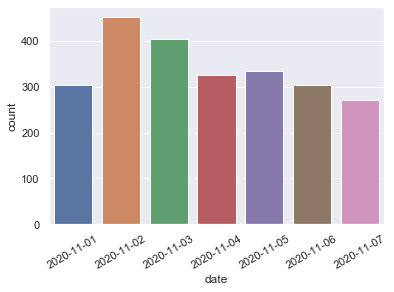

In [24]:
sns.set_theme()

sns.countplot(x="date", data=tweets_df)
plt.xticks(rotation=30)

plt.savefig("./graphs/maps_count.png")